## Ejemplo 1: K-Medias

### 1. Objetivos:
    - Aprender a aplicar un algoritmo de K-Medias
    
---
    
### 2. Desarrollo:

Tenemos un dataset que contiene latitudes y longitudes de algunos crímenes cometidos en una región no especificada:

El algoritmo de $k$ medias, es un algoritmo de aprendizaje no-supervisado. Tiene la intención de armar grupos (o clusters) cuando se cuenta con datos heterogéneos.

Es decir, cuando tenemos un conjunto de datos heterogéneos (i.e. muy diferentes), se quiere hacer grupitos en donde sí haya cierta homogeneidad.


Su intención es hacer clusters donde haya cierta homegeneidad en cada uno de esos clusters

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../../Datasets/crimenes_locacion.csv')

df.head()

,codigo_crimen,latitud,longitud
0,8,-15.068712,0.157991
1,0,-4.065913,12.491768
2,1,3.141179,-12.090601
3,8,8.806998,14.316892
4,3,-5.773641,15.487286


Vamos a visualizar los puntos geográficos formados por cada par de latitudes y longitudes:

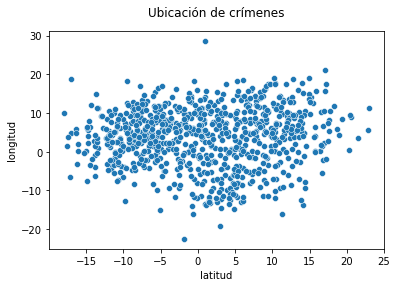

In [5]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Ubicación de crímenes', pad=15)
ax.set_xlabel('latitud')
ax.set_ylabel('longitud')

sns.scatterplot(x=df['latitud'], y=df['longitud'], ax=ax);

Digamos que queremos establecer algunos centros de vigilancia en esta región. Queremos que cada centro de vigilancia pueda atender efectivamente a la subregión que le toque vigilar. Para esto, tenemos que subdividir nuestra región en varias subregiones. No sabemos cómo se conforman esas subregiones, ni tampoco sabemos a qué subregión pertenecería cada una de las instancias de actividad delictiva.

Asumiendo que los patrones de actividad delictiva se mantienen más o menos constantes, podemos utilizar K-Medias para subdividir nuestra región en subregiones. Lo único que tenemos que elegir es cuántas subregiones queremos conformar. Esta decisión podría ser tomada con base en los recursos disponibles, por ejemplo. Si tuviéramos recursos para establecer 6 centros de vigilancia, entonces podemos crear 6 subregiones.

¿Cuál es la lógica del algortimo?

1. asigna aleatoriamente a cada punto en un cluster
2. Calcula la media en cada uno de los clusters, y con esto obtiene k representes (que se conocen como k medias)
3. Reasigna a los puntos originales dependiendo a cual de los K representantes está cercano.
4. Repite 2 y 3 hasta que ya no haya reasignaciones o bien hasta alcance un número de iteraciones preestablecidas

In [6]:
# La sublibrería de sklearn que vamos a ocupar es KMeans

from sklearn.cluster import KMeans

In [7]:
# La función Kmeans, requiere el número de clusters o grupitos que se quieren

k_means = KMeans(n_clusters=6, max_iter=10000)

In [8]:
k_means.fit(df[['latitud', 'longitud']])

KMeans(max_iter=10000, n_clusters=6)

In [9]:
# con el método cluster_centers_ obtenemos a los k representantes

centers = k_means.cluster_centers_

centers

array([[ 4.56650842, -8.83674895],
       [-5.94719924,  9.54390182],
       [ 1.31804642,  2.59682226],
       [-9.89560612,  0.53889083],
       [13.04063943,  4.39278973],
       [ 7.90779895, 12.61261293]])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


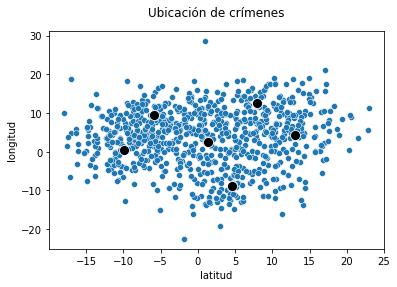

In [11]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Ubicación de crímenes', pad=15)
ax.set_xlabel('latitud')
ax.set_ylabel('longitud')

sns.scatterplot(x= df['latitud'], y=df['longitud'], ax=ax, palette='rainbow');
sns.scatterplot(centers[:,0], centers[:,1], ax=ax, s=100, color='black');

Vamos a clasificar nuestros datos para poder colorearlos y visualizar mejor las subregiones:

In [12]:
#Vamos a ocupar el método k_means.predict para que nos diga a qué cluster 
# pertenece cada punto

clasificaciones = k_means.predict(df[['latitud', 'longitud']])

In [13]:
clasificaciones

array([3, 1, 0, 5, 1, 3, 4, 5, 4, 4, 0, 1, 0, 1, 1, 2, 2, 5, 1, 2, 1, 1,
       2, 5, 1, 2, 5, 3, 0, 5, 1, 0, 5, 5, 0, 0, 5, 4, 5, 0, 2, 4, 4, 0,
       3, 3, 3, 0, 4, 3, 5, 0, 4, 1, 0, 5, 4, 5, 0, 1, 4, 2, 1, 1, 4, 4,
       0, 2, 0, 0, 4, 0, 4, 5, 3, 1, 3, 2, 4, 0, 1, 1, 1, 2, 5, 0, 1, 2,
       1, 1, 1, 4, 1, 5, 1, 3, 1, 3, 5, 1, 5, 2, 5, 2, 5, 2, 3, 5, 2, 4,
       1, 1, 3, 2, 1, 2, 3, 3, 3, 4, 4, 5, 5, 5, 5, 3, 3, 3, 4, 2, 0, 0,
       1, 5, 2, 3, 2, 0, 1, 1, 0, 0, 2, 5, 3, 5, 3, 3, 2, 3, 5, 0, 1, 4,
       2, 1, 1, 4, 3, 2, 0, 2, 2, 5, 3, 2, 2, 2, 2, 0, 3, 1, 4, 2, 1, 1,
       4, 1, 4, 0, 4, 1, 3, 0, 4, 3, 4, 3, 2, 5, 0, 4, 1, 1, 4, 3, 4, 1,
       4, 1, 2, 4, 3, 2, 4, 1, 3, 2, 2, 5, 2, 1, 1, 0, 5, 1, 4, 1, 5, 1,
       2, 3, 2, 2, 5, 2, 4, 0, 0, 2, 2, 4, 3, 1, 5, 2, 1, 0, 1, 2, 1, 5,
       5, 5, 4, 3, 3, 2, 0, 3, 3, 3, 5, 5, 3, 3, 0, 2, 2, 1, 0, 0, 0, 4,
       2, 1, 5, 5, 5, 3, 1, 4, 1, 0, 4, 1, 2, 3, 1, 2, 1, 2, 1, 1, 2, 0,
       2, 1, 4, 4, 1, 3, 1, 2, 3, 1, 1, 1, 0, 5, 5,

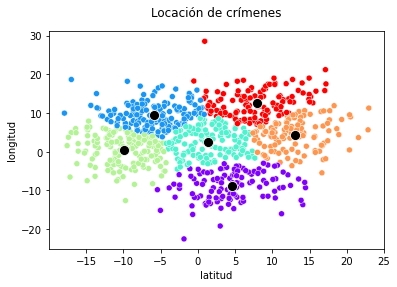

In [15]:
fig = plt.figure()

# Para compartir el canvas y ejes
ax = fig.add_subplot()

# Para el título del gráfico y nombre de los ejes
ax.set_title('Locación de crímenes', pad=15)
ax.set_xlabel('latitud')
ax.set_ylabel('longitud')

# pintamos los puntos basados en el grupo al que pertencen en el parámetro hue
# agregamos las clasificaciones que dió el algoritmo
sns.scatterplot(x = df['latitud'], y = df['longitud'], ax=ax, hue=clasificaciones, palette='rainbow');

# Pintamos los centros
sns.scatterplot(x = centers[:,0], y = centers[:,1], ax=ax, s=100, color='black');

ax.get_legend().remove()

Subdiviendo nuestra región en estas 6 subregiones, tenemos cierta seguridad de que toda la actividad delictiva que sucede en la región podrá ser atendida efectivamente.

Si tuviéramos recursos para 9 centros de vigilancia, bastaría con realizar lo siguiente:

In [16]:
k_means_9 = KMeans(n_clusters=9, max_iter=10000)

In [17]:
k_means_9.fit(df[['latitud', 'longitud']])
centers_9 = k_means_9.cluster_centers_
clasificaciones_9 = k_means_9.predict(df[['latitud', 'longitud']])

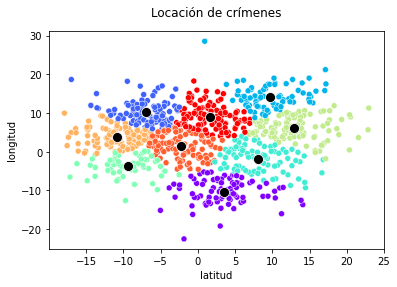

In [19]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Locación de crímenes', pad=15)
ax.set_xlabel('latitud')
ax.set_ylabel('longitud')

sns.scatterplot(x = df['latitud'], y = df['longitud'], ax=ax, hue=clasificaciones_9, palette='rainbow');
sns.scatterplot(x = centers_9[:,0], y = centers_9[:,1], ax=ax, s=100, color='black');

ax.get_legend().remove()

**¿Qué usos se te ocurren a ti para este algoritmo?**